<a href="https://colab.research.google.com/github/namita0210/ML-Models/blob/main/storageForecast_swoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
path = (r'/content/drive/MyDrive/forecastData.xlsx')
df = pd.read_excel(path)

In [159]:
df.tail()

,Date,Storage Count,User Activity
54,2023-02-24,320,128
55,2023-02-25,325,130
56,2023-02-26,330,132
57,2023-02-27,335,134
58,2023-02-28,340,136


In [160]:
print(f'''
      Columns: {df.columns}
      Shape: {df.shape}
      Null Values: {df.isnull().sum()}
      Min Date: {df['Date'].min()}
      Max Date: {df['Date'].max()}
 ''')


      Columns: Index(['Date', 'Storage Count', 'User Activity'], dtype='object')
      Shape: (59, 3)
      Null Values: Date             0
Storage Count    0
User Activity    0
dtype: int64
      Min Date: 2023-01-01 00:00:00
      Max Date: 2023-02-28 00:00:00
 


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           59 non-null     datetime64[ns]
 1   Storage Count  59 non-null     int64         
 2   User Activity  59 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.5 KB


In [162]:
df.describe()

,Storage Count,User Activity
count,59.00000,59.000000
mean,195.00000,78.000000
std,85.87782,34.351128
min,50.00000,20.000000
25%,122.50000,49.000000
50%,195.00000,78.000000
75%,267.50000,107.000000
max,340.00000,136.000000


In [163]:
x = df['Storage Count']
y = df['User Activity']

<ipython-input-164-b1ced2c5820c>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


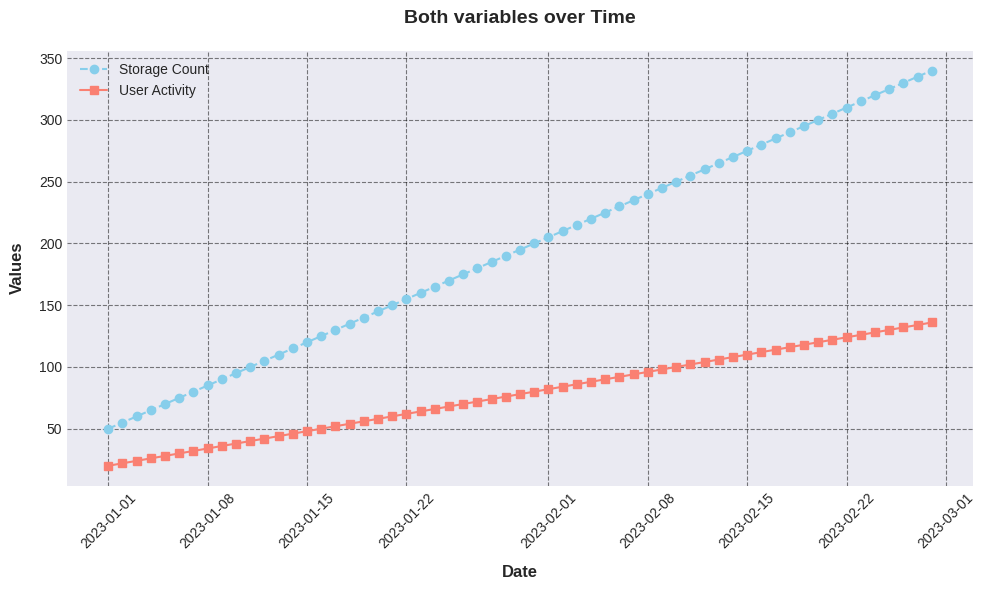

In [164]:
# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')
# Plotting int_column1
plt.plot(df['Date'], df['Storage Count'], label='Storage Count', linestyle='--', marker='o', color='skyblue')
# Plotting int_column2
plt.plot(df['Date'], df['User Activity'], label='User Activity', linestyle='-', marker='s', color='salmon')
plt.xlabel('Date',fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Values',fontsize=12, fontweight='bold', labelpad=10)
plt.title('Both variables over Time', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', color='black', alpha=0.5)
plt.tight_layout()
plt.legend(fontsize=10)
plt.show()

In [165]:
# Splitting data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df['Storage Count'][:train_size], df['Storage Count'][train_size:]

In [166]:
# Fitting an ARIMA model
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [167]:
forecast_steps = 365 * 5  # For 5 years forecast

In [168]:
# Forecasting
forecast = fitted_model.forecast(steps=forecast_steps)

In [169]:
forecast

47       284.999976
48       289.999907
49       294.999791
50       299.999628
51       304.999420
           ...     
1867    9308.825267
1868    9313.741816
1869    9318.658320
1870    9323.574779
1871    9328.491192
Name: predicted_mean, Length: 1825, dtype: float64

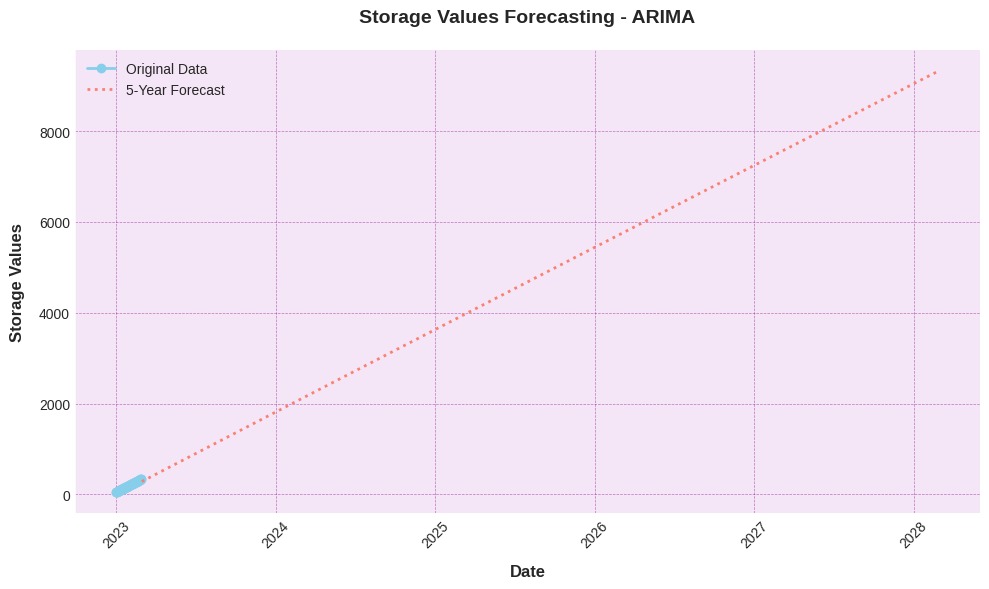

In [170]:
# Plotting the original data and forecast with enhanced aesthetics
plt.figure(figsize=(10, 6))

# Plotting original data with blue color and markers, adding labels and linewidth
plt.plot(df['Date'], df['Storage Count'], label='Original Data',  marker='o', markersize=6, color='skyblue', linewidth=2)

# Plotting forecast with red dashed line and adding labels and linewidth
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='5-Year Forecast',linestyle=':', color='salmon', linewidth=2)



plt.xlabel('Date', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Storage Values', fontsize=12, fontweight='bold', labelpad=10)
plt.title('Storage Values Forecasting - ARIMA', fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=10, loc='upper left')  # Changed legend location
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='purple')


# Adding background color and border to the plot
plt.gca().set_facecolor('#f5e6f7')  # Light gray background
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

plt.tight_layout()
plt.show()


In [171]:
arima_results = forecast

In [195]:
arima_results

,Date,Storage Count,User Activity,ds,y
0,2023-01-01,50,20,2023-01-01,50
1,2023-01-02,55,22,2023-01-02,55
2,2023-01-03,60,24,2023-01-03,60
3,2023-01-04,65,26,2023-01-04,65
4,2023-01-05,70,28,2023-01-05,70
5,2023-01-06,75,30,2023-01-06,75
6,2023-01-07,80,32,2023-01-07,80
7,2023-01-08,85,34,2023-01-08,85
8,2023-01-09,90,36,2023-01-09,90
9,2023-01-10,95,38,2023-01-10,95


In [197]:
arima_file_path = '/content/drive/MyDrive/swoc_forecast_results/AR.csv'
arima_results.to_csv(arima_file_path, index=False)

In [172]:
# Fitting a SARIMA model
model = SARIMAX(df['Storage Count'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Assuming monthly seasonality
fitted_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [173]:
# Forecasting 5 years ahead
forecast_steps = 12 * 5  # For 5 years forecast with monthly data

In [174]:
forecast = fitted_model.get_forecast(steps=forecast_steps)

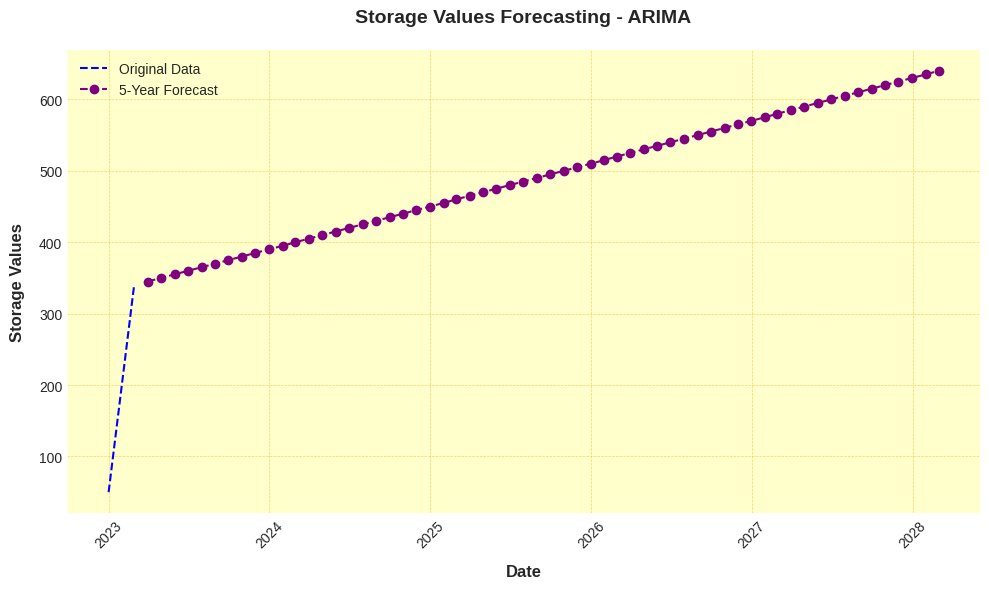

In [175]:
# Plotting original data and the 5-year forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Storage Count'], label='Original Data',linestyle="--",color='blue')
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:], forecast.predicted_mean, label='5-Year Forecast', linestyle='--',marker="o", color='purple')

plt.xlabel('Date', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Storage Values', fontsize=12, fontweight='bold', labelpad=10)
plt.title('Storage Values Forecasting - ARIMA', fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=10, loc='upper left')  # Changed legend location
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='orange')


# Adding background color and border to the plot
plt.gca().set_facecolor('#ffffcc')  # Light gray background
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

plt.tight_layout()
plt.show()



In [176]:
sarima_results = forecast

In [194]:
sarima_results

,Date,Storage Count,User Activity,ds,y
0,2023-01-01,50,20,2023-01-01,50
1,2023-01-02,55,22,2023-01-02,55
2,2023-01-03,60,24,2023-01-03,60
3,2023-01-04,65,26,2023-01-04,65
4,2023-01-05,70,28,2023-01-05,70
5,2023-01-06,75,30,2023-01-06,75
6,2023-01-07,80,32,2023-01-07,80
7,2023-01-08,85,34,2023-01-08,85
8,2023-01-09,90,36,2023-01-09,90
9,2023-01-10,95,38,2023-01-10,95


In [198]:
sarima_file_path = '/content/drive/MyDrive/swoc_forecast_results/SR.csv'
sarima_results.to_csv(sarima_file_path, index=False)

In [177]:
model = Prophet()

In [178]:
df['ds']=df['Date']
df['y'] = df['Storage Count']

In [179]:
# Fit the model to the dataset
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrxnptod/wagb6guv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrxnptod/xh1h97d_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77243', 'data', 'file=/tmp/tmpzrxnptod/wagb6guv.json', 'init=/tmp/tmpzrxnptod/xh1h97d_.json', 'output', 'file=/tmp/tmpzrxnptod/prophet_model0qsj4f9g/prophet_model-20231230072415.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:24:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [180]:
# Create a dataframe for future predictions (5 years ahead)
future = model.make_future_dataframe(periods=365 * 5, freq='D')

In [181]:
# Make predictions
forecast = model.predict(future)

In [182]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,50.000060,50.000060,50.000060,50.000060,50.000060,-1.292702e-14,-1.292702e-14,-1.292702e-14,-1.292702e-14,-1.292702e-14,-1.292702e-14,0.0,0.0,0.0,50.000060
1,2023-01-02,55.000059,55.000059,55.000059,55.000059,55.000059,1.887304e-14,1.887304e-14,1.887304e-14,1.887304e-14,1.887304e-14,1.887304e-14,0.0,0.0,0.0,55.000059
2,2023-01-03,60.000058,60.000058,60.000058,60.000058,60.000058,1.504763e-14,1.504763e-14,1.504763e-14,1.504763e-14,1.504763e-14,1.504763e-14,0.0,0.0,0.0,60.000058
3,2023-01-04,65.000057,65.000057,65.000057,65.000057,65.000057,8.136344e-15,8.136344e-15,8.136344e-15,8.136344e-15,8.136344e-15,8.136344e-15,0.0,0.0,0.0,65.000057
4,2023-01-05,70.000056,70.000056,70.000056,70.000056,70.000056,-7.903939e-15,-7.903939e-15,-7.903939e-15,-7.903939e-15,-7.903939e-15,-7.903939e-15,0.0,0.0,0.0,70.000056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,2028-02-23,9444.998116,9444.994925,9445.001331,9444.994925,9445.001331,8.136344e-15,8.136344e-15,8.136344e-15,8.136344e-15,8.136344e-15,8.136344e-15,0.0,0.0,0.0,9444.998116
1880,2028-02-24,9449.998115,9449.994922,9450.001333,9449.994922,9450.001333,-7.903939e-15,-7.903939e-15,-7.903939e-15,-7.903939e-15,-7.903939e-15,-7.903939e-15,0.0,0.0,0.0,9449.998115
1881,2028-02-25,9454.998114,9454.994920,9455.001334,9454.994920,9455.001334,-9.795558e-15,-9.795558e-15,-9.795558e-15,-9.795558e-15,-9.795558e-15,-9.795558e-15,0.0,0.0,0.0,9454.998114
1882,2028-02-26,9459.998113,9459.994918,9460.001335,9459.994918,9460.001335,-1.143049e-14,-1.143049e-14,-1.143049e-14,-1.143049e-14,-1.143049e-14,-1.143049e-14,0.0,0.0,0.0,9459.998113


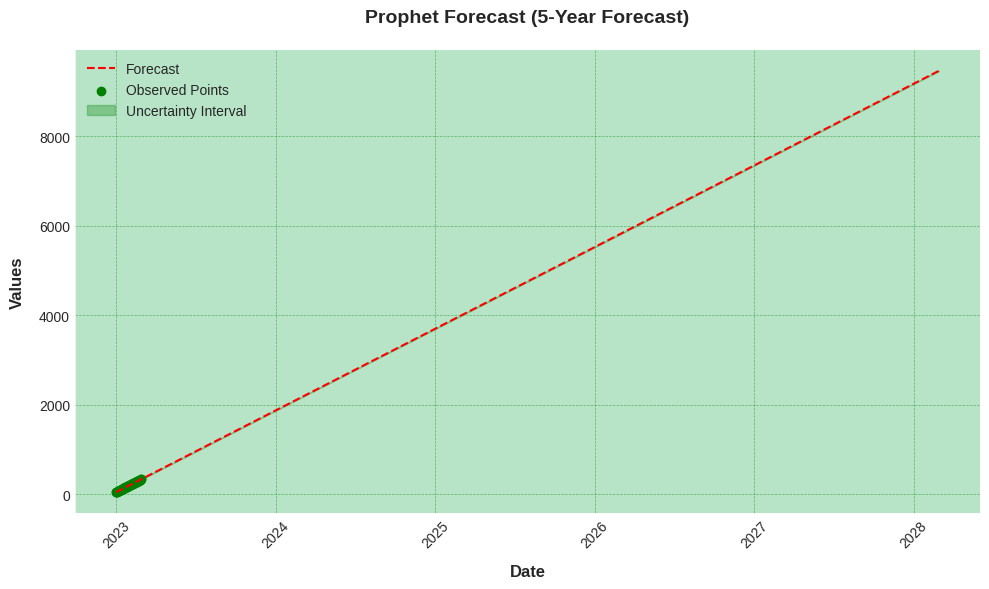

In [183]:
# Plotting the forecast with improved aesthetics and legends
plt.figure(figsize=(10, 6))

# Plotting the forecast line with a custom color
plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Forecast', linestyle="--")

# Plotting the observed points
plt.scatter(df['ds'], df['y'], color='green', label='Observed Points')

# Filling the uncertainty interval with a custom color
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.3, label='Uncertainty Interval')

# Adding legends
plt.legend(fontsize=10, loc='upper left')

# Setting labels and title
plt.title('Prophet Forecast (5-Year Forecast)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Values', fontsize=12, fontweight='bold', labelpad=10)

# Adjusting background, grid, and border
plt.gca().set_facecolor('#b7e4c7')  # Light mint background
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color="green")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [193]:
fb_results = forecast
fb_results

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,50.000060,50.000060,50.000060,50.000060,50.000060,-1.292702e-14,-1.292702e-14,-1.292702e-14,-1.292702e-14,-1.292702e-14,-1.292702e-14,0.0,0.0,0.0,50.000060
1,2023-01-02,55.000059,55.000059,55.000059,55.000059,55.000059,1.887304e-14,1.887304e-14,1.887304e-14,1.887304e-14,1.887304e-14,1.887304e-14,0.0,0.0,0.0,55.000059
2,2023-01-03,60.000058,60.000058,60.000058,60.000058,60.000058,1.504763e-14,1.504763e-14,1.504763e-14,1.504763e-14,1.504763e-14,1.504763e-14,0.0,0.0,0.0,60.000058
3,2023-01-04,65.000057,65.000057,65.000057,65.000057,65.000057,8.136344e-15,8.136344e-15,8.136344e-15,8.136344e-15,8.136344e-15,8.136344e-15,0.0,0.0,0.0,65.000057
4,2023-01-05,70.000056,70.000056,70.000056,70.000056,70.000056,-7.903939e-15,-7.903939e-15,-7.903939e-15,-7.903939e-15,-7.903939e-15,-7.903939e-15,0.0,0.0,0.0,70.000056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,2028-02-23,9444.998116,9444.994925,9445.001331,9444.994925,9445.001331,8.136344e-15,8.136344e-15,8.136344e-15,8.136344e-15,8.136344e-15,8.136344e-15,0.0,0.0,0.0,9444.998116
1880,2028-02-24,9449.998115,9449.994922,9450.001333,9449.994922,9450.001333,-7.903939e-15,-7.903939e-15,-7.903939e-15,-7.903939e-15,-7.903939e-15,-7.903939e-15,0.0,0.0,0.0,9449.998115
1881,2028-02-25,9454.998114,9454.994920,9455.001334,9454.994920,9455.001334,-9.795558e-15,-9.795558e-15,-9.795558e-15,-9.795558e-15,-9.795558e-15,-9.795558e-15,0.0,0.0,0.0,9454.998114
1882,2028-02-26,9459.998113,9459.994918,9460.001335,9459.994918,9460.001335,-1.143049e-14,-1.143049e-14,-1.143049e-14,-1.143049e-14,-1.143049e-14,-1.143049e-14,0.0,0.0,0.0,9459.998113


In [199]:
fb_file_path = '/content/drive/MyDrive/swoc_forecast_results/FR.csv'
fb_results.to_csv(fb_file_path, index=False)

In [200]:
arima_results = pd.read_csv(arima_file_path)
sarima_results = pd.read_csv(sarima_file_path)
prophet_results = pd.read_csv(fb_file_path)

In [209]:
arima_results.tail(3)

,Date,Storage Count,User Activity,ds,y
56,2023-02-26,330,132,2023-02-26,330
57,2023-02-27,335,134,2023-02-27,335
58,2023-02-28,340,136,2023-02-28,340


In [208]:
sarima_results.tail(3)

,Date,Storage Count,User Activity,ds,y
56,2023-02-26,330,132,2023-02-26,330
57,2023-02-27,335,134,2023-02-27,335
58,2023-02-28,340,136,2023-02-28,340


In [203]:
prophet_results.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,50.000060,50.000060,50.000060,50.000060,50.000060,-1.292702e-14,-1.292702e-14,-1.292702e-14,-1.292702e-14,-1.292702e-14,-1.292702e-14,0.0,0.0,0.0,50.000060
1,2023-01-02,55.000059,55.000059,55.000059,55.000059,55.000059,1.887304e-14,1.887304e-14,1.887304e-14,1.887304e-14,1.887304e-14,1.887304e-14,0.0,0.0,0.0,55.000059
2,2023-01-03,60.000058,60.000058,60.000058,60.000058,60.000058,1.504763e-14,1.504763e-14,1.504763e-14,1.504763e-14,1.504763e-14,1.504763e-14,0.0,0.0,0.0,60.000058


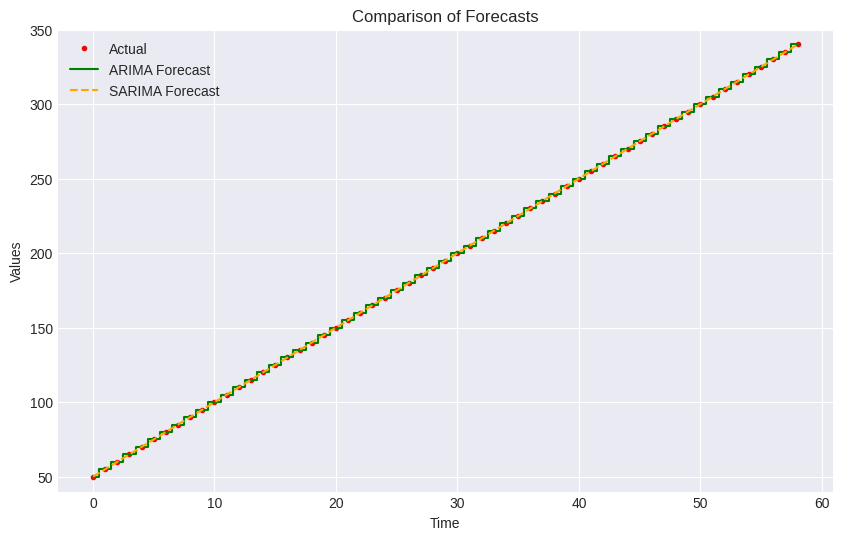

In [224]:
plt.figure(figsize=(10, 6))
plt.plot(arima_results['Storage Count'], label='Actual', linestyle='', marker='o', markersize=3, color='red')
plt.plot(arima_results['y'], label='ARIMA Forecast', linestyle='-', drawstyle='steps-mid', color='green')  # Zigzag line
plt.plot(sarima_results['y'], label='SARIMA Forecast', linestyle='--', color='orange')

# Set y-axis limits
plt.ylim(min(arima_results['Storage Count'].min(), arima_results['y'].min(), sarima_results['y'].min()) - 10,
         max(arima_results['Storage Count'].max(), arima_results['y'].max(), sarima_results['y'].max()) + 10)

plt.legend()
plt.title('Comparison of Forecasts')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()
